In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv('heart_disease_uci.csv')

In [52]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [53]:
print(df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


# Encoding categorical columns

In [54]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df['dataset'] = le.fit_transform(df['dataset'])
df['exang'] = le.fit_transform(df['exang'])

In [55]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [56]:

df.drop(columns=['dataset'], inplace=True)
df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [57]:

df.rename(columns={'num':'output'}, inplace=True)
df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [58]:


df['output'] = df['output'].apply(lambda x: 0 if x == 0 else 1)
df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,output
0,1,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


# Dealing with missing values

In [59]:


df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['restecg'] = df['restecg'].fillna(df['restecg'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['exang'] = df['exang'].fillna(df['exang'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['slope'] = df['slope'].fillna(df['slope'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mean())


In [60]:
print(df.isnull().sum())

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
dtype: int64


# Explore the distribution of the target variable

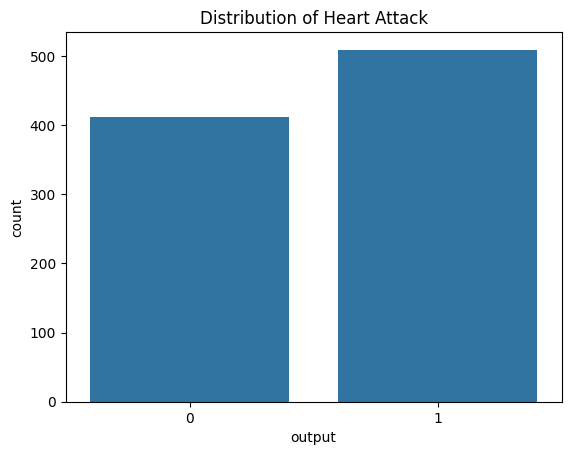

In [61]:
import seaborn as sns
sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

# Explore correlations between features

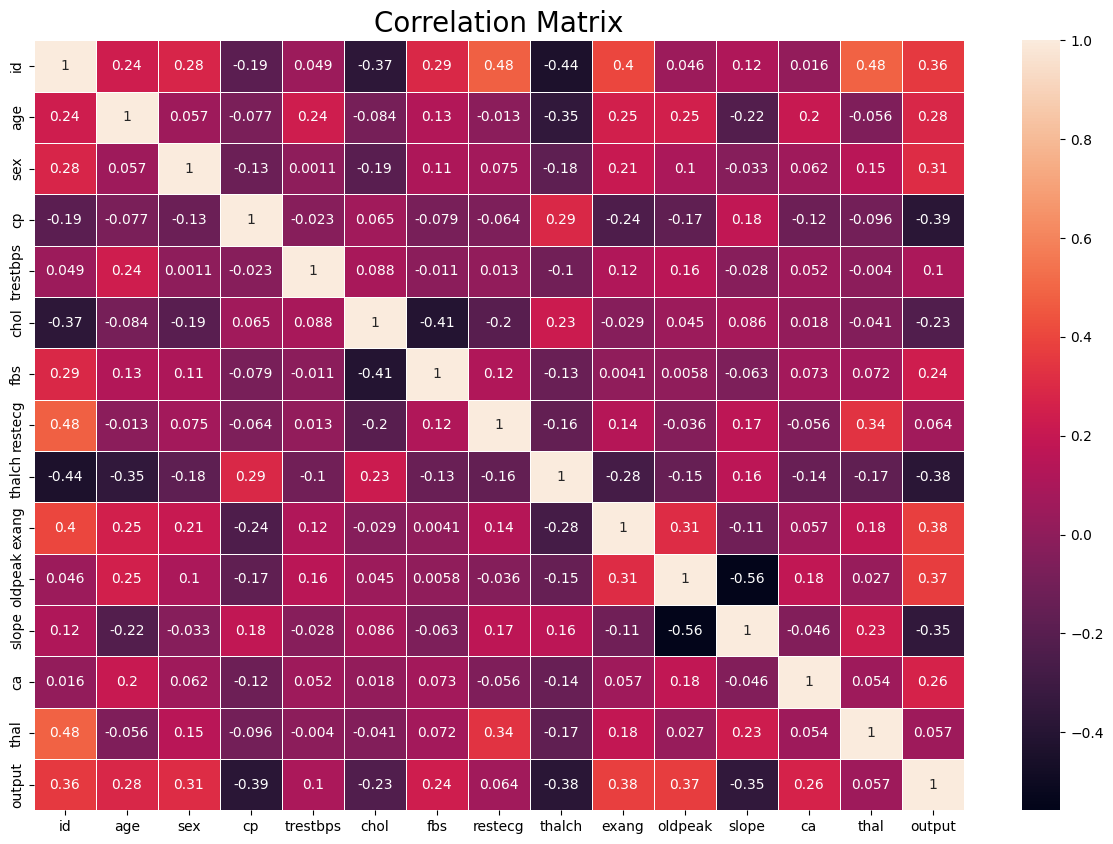

In [71]:
# prompt: genearate corelation matri but in different color

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.title('Correlation Matrix', fontsize=20)
plt.show()


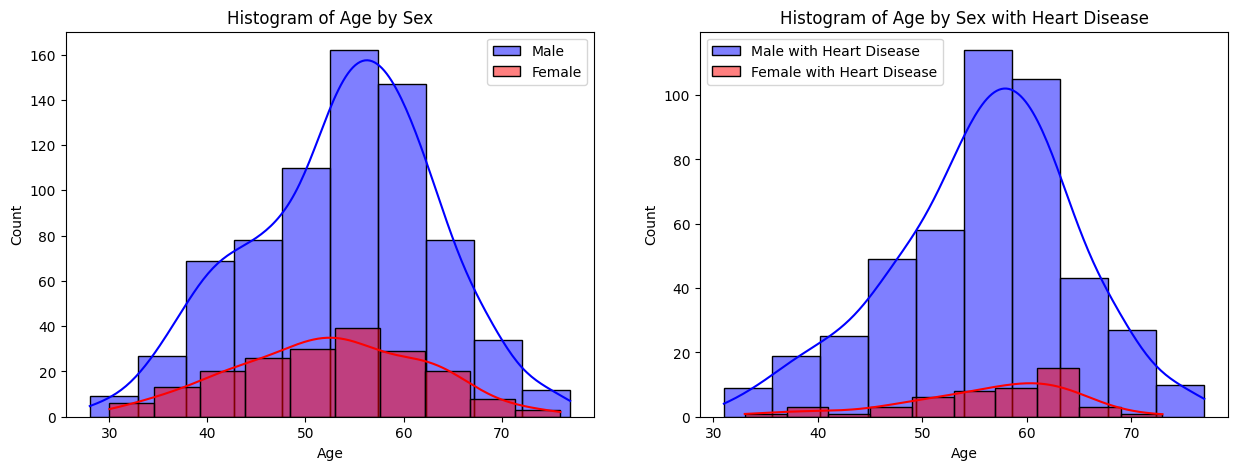

In [77]:
# prompt: histogram of male and female of getting heart disease by age

df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_male['age'], bins=10, kde=True, color='blue', label='Male')
sns.histplot(df_female['age'], bins=10, kde=True, color='red', label='Female')
plt.title('Histogram of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_male['age'][df_male['output'] == 1], bins=10, kde=True, color='blue', label='Male with Heart Disease')
sns.histplot(df_female['age'][df_female['output'] == 1], bins=10, kde=True, color='red', label='Female with Heart Disease')
plt.title('Histogram of Age by Sex with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()


# Split the data into features (X) and target variable (y)

In [64]:
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and testing sets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}


In [68]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.83
Training Decision Tree...
Decision Tree Accuracy: 0.84
Training Random Forest...
Random Forest Accuracy: 0.88
Training SVM...
SVM Accuracy: 0.86
Training KNN...
KNN Accuracy: 0.82
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.85
Training XGBoost...
XGBoost Accuracy: 0.86
Training AdaBoost...
AdaBoost Accuracy: 0.83
Training Naive Bayes...
Naive Bayes Accuracy: 0.82
Training MLP Neural Network...
MLP Neural Network Accuracy: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [69]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.83
Decision Tree Accuracy: 0.81
Random Forest Accuracy: 0.90
SVM Accuracy: 0.86
KNN Accuracy: 0.82
Gradient Boosting Accuracy: 0.85
XGBoost Accuracy: 0.86
AdaBoost Accuracy: 0.83
Naive Bayes Accuracy: 0.82
MLP Neural Network Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# Model Comparison

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



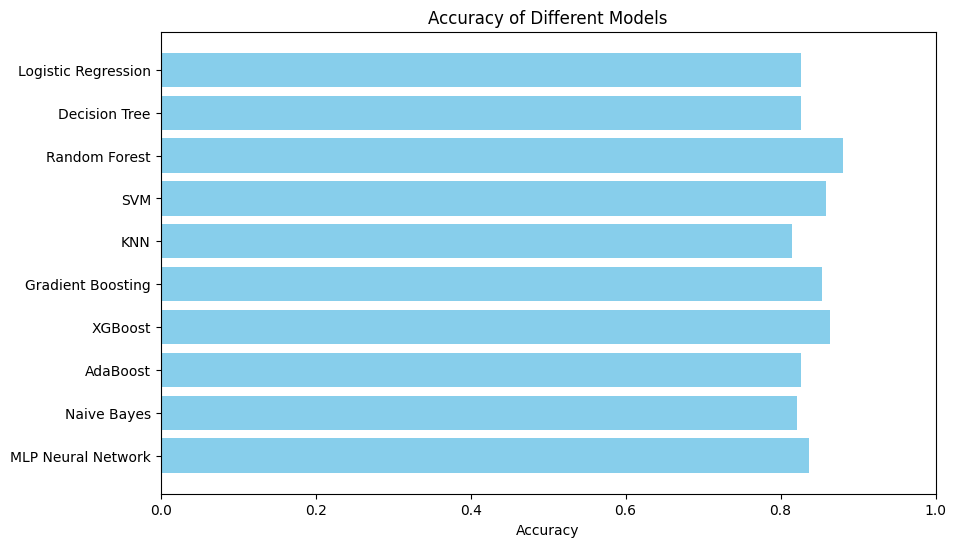

In [70]:
# Dictionary to store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()